# Разведочный анализ данных

Это задание посвящено изучению данных и построению различных визуализаций.  
Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы будем работать с датассетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Классическая задача, решаемая на этих данных: предсказать, выжил пассажир или нет по его характеристикам.  
То есть целевая переменная - столбец `Survived`.

Цели:
* познакомиться с библиотекой `seaborn`
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и оценим ее качество.

## Подключение библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

Фиксируем `random_state` для воспроизводимости случайных значений.

In [2]:
RANDOM_STATE = 42

Загрузим данные.

In [3]:
Data = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )

**Описание признаков**

- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

## Обзор данных

Посмотрим на *5* случайных объектов из датасета.

In [4]:
Data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
218,219,1,1,Bazzani; Miss. Albina,female,32.0,0,0,11813,76.2917,D15,C
290,291,1,1,"Barber; Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
186,187,1,3,"O'Brien; Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
351,352,0,1,Williams-Lambert; Mr. Fletcher Fellows,male,NaN,0,0,113510,35.0000,C128,S
200,201,0,3,Vande Walle; Mr. Nestor Cyriel,male,28.0,0,0,345770,9.5000,NaN,S


Выведите на экран размеры таблицы *Data*.

**Вопрос:** сколько объектов в данных?

In [5]:
Data.shape[0]

891

## Обработка признаков и однофакторный анализ

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Выведем на экран основные числовые характеристики числовых столбцов.  
Это можно сделать при помощи функции `describe`.

In [6]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Основные статистики можно посмотреть и по категориальным колонкам.  
Для этого в функцию `describe` нужно передать аргумент `include='object'`.

Сделайте это.

В строке *count* отображается количество непропущенных значений в каждом столбце.

In [7]:
Data.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,3,681,147,3
top,Braund; Mr. Owen Harris,male,347082,B96 B98,S
freq,1,574,7,4,644


**Вопрос:** в скольких категориальных колонках есть пропуски?

In [8]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Столбец Sex

В столбце пол (`Sex`) три различных значения. Посмотрим на них.

In [12]:
Data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

Удалим пассажиров неизвестного пола, так как их всего *5*.

In [13]:
Data = Data[Data['Sex'] != 'unknown']

Проверьте, что строки с неизвестным полом исчезли.

In [14]:
Data['Sex'].value_counts()

male      574
female    312
Name: Sex, dtype: int64

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа.

Закодировать значения столбца с двумя категориями можно следующим образом. Пусть в воображаемом столбце *animal* есть два значения: *cat* и *dog*. Их можно перевести в *0* и *1* при помощи функции `map`:

`Data['animal'] = Data['animal'].map({'cat' : 1, 'dog' : 0})`


По аналогии закодируйте столбец `Sex` (*male* - *1*, *female* - *0*).

In [15]:
Data['Sex'] = Data['Sex'].map({'male' : 1, 'female' : 0})

C:\Users\админ\AppData\Local\Temp\ipykernel_20956\2991753038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Sex'] = Data['Sex'].map({'male' : 1, 'female' : 0})


**Вопрос** посчитайте сумму значений в закодированном столбце `Sex`.

In [17]:
Data['Sex'].sum()

574

Посмотрим, как влияет пол на выживаемость.

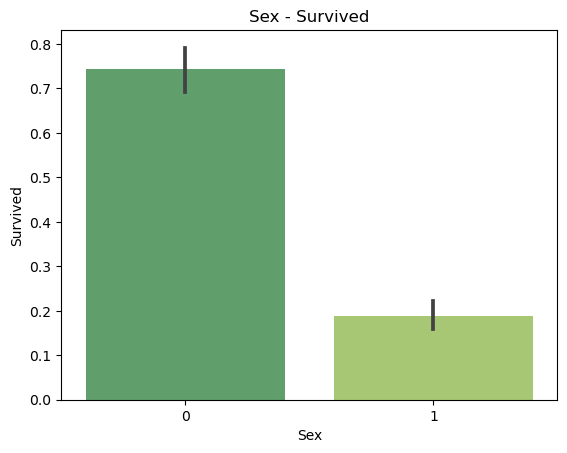

In [18]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show();

Гистограмму можно детализировать, добавив значение параметра `hue`.

### Столбец Pclass

Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.  
Используйте `barplot`.

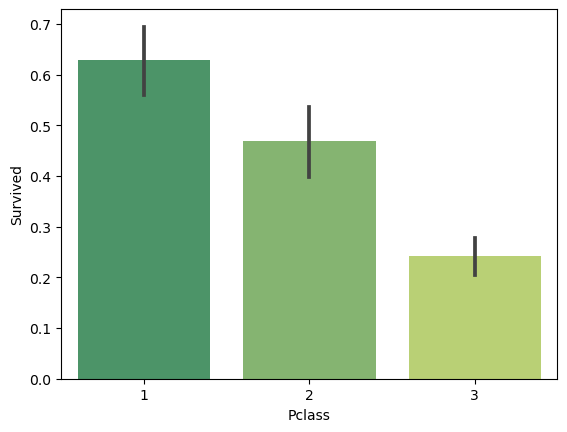

In [20]:
sns.barplot(x='Pclass', y='Survived', data=Data, palette='summer')
plt.show()

**Вопрос:** пассажиры из какого класса выживали чаще всего?

Чаще всего выживал первый класс

Посмотрим, как влияет пол человека и класс билета (`Pclass`) на выживаемость

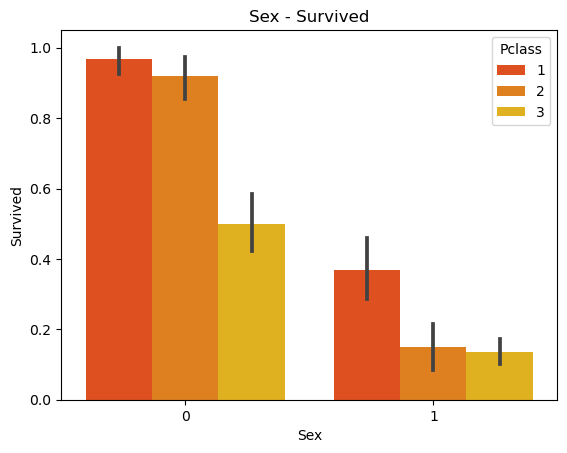

In [21]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show();

### Столбец Embarked

**Вопрос** сколько различных значений принимает признак `Embarked`?

In [29]:
print(Data['Embarked'].value_counts())
print(f"{Data['Embarked'].value_counts().count()} различных значения")

S    641
C    168
Q     75
Name: Embarked, dtype: int64
3 различных значения


Пока что мы не обсуждали, как переводить в числа категориальные признаки с больше, чем двумя категориями.  
Поэтому давайте отбросим этот признак.

Сделайте это (вам пригодится метод [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

In [30]:
Data = Data.drop(['Embarked'], axis=1)
Data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
85,86,1,3,Backstrom; Mrs. Karl Alfred (Maria Mathilda Gu...,0,33.0,3,0,3101278,15.8500,NaN
819,820,0,3,Skoog; Master. Karl Thorsten,1,10.0,3,2,347088,27.9000,NaN
640,641,0,3,Jensen; Mr. Hans Peder,1,20.0,0,0,350050,7.8542,NaN
772,773,0,2,Mack; Mrs. (Mary),0,57.0,0,0,S.O./P.P. 3,10.5000,E77
649,650,1,3,Stanley; Miss. Amy Zillah Elsie,0,23.0,0,0,CA. 2314,7.5500,NaN


### Столбец Age

Обработаем признак `Age`.

Мы помним, что в этом признаке много пропусков.

Заполним пропуски медианным значением `Age`.

In [31]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

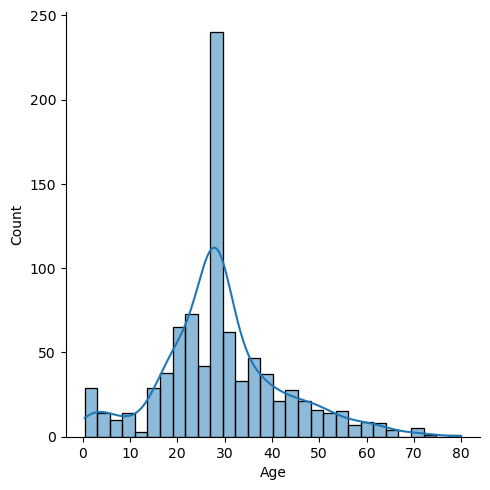

In [32]:
sns.displot(Data['Age'], kde=True)
plt.show();

### Другие столбцы

Удалите признак `Fare`. Он сильно связан с признаком `Pclass`, поэтому нам не нужен.

In [33]:
Data = Data.drop(['Fare'], axis=1)

**Вопрос:** сколько на данный момент колонок в таблице `Data`?

In [34]:
Data.shape[1]

10

Столбец `PassengerId` является категориальным и не несёт важной информации, удалите его.

Столбцы `Ticket`, `Name` и `Cabin` в этот раз нам также не понадобятся. Удалите и их.

In [41]:
Data = Data.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1)


После минимальной обработки данных у нас получилась следующая таблица:

In [43]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Исследование признаков

Нарисуйте матрицу корреляций столбцов между собой.

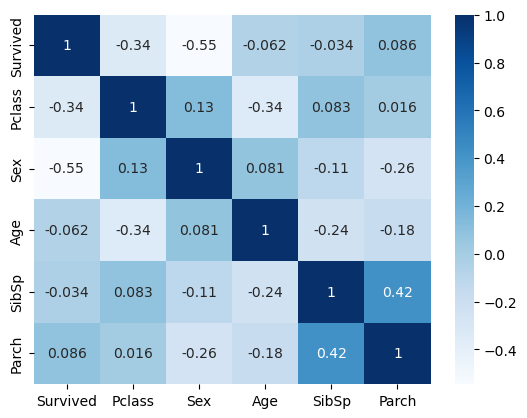

In [48]:
corr = Data.corr()
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show()

**Вопрос:** какой столбец сильнее всего коррелирует с целевой переменной `Survived`? Ответ: **SEX**

Посмотрим на попарные зависимости некоторых признаков.

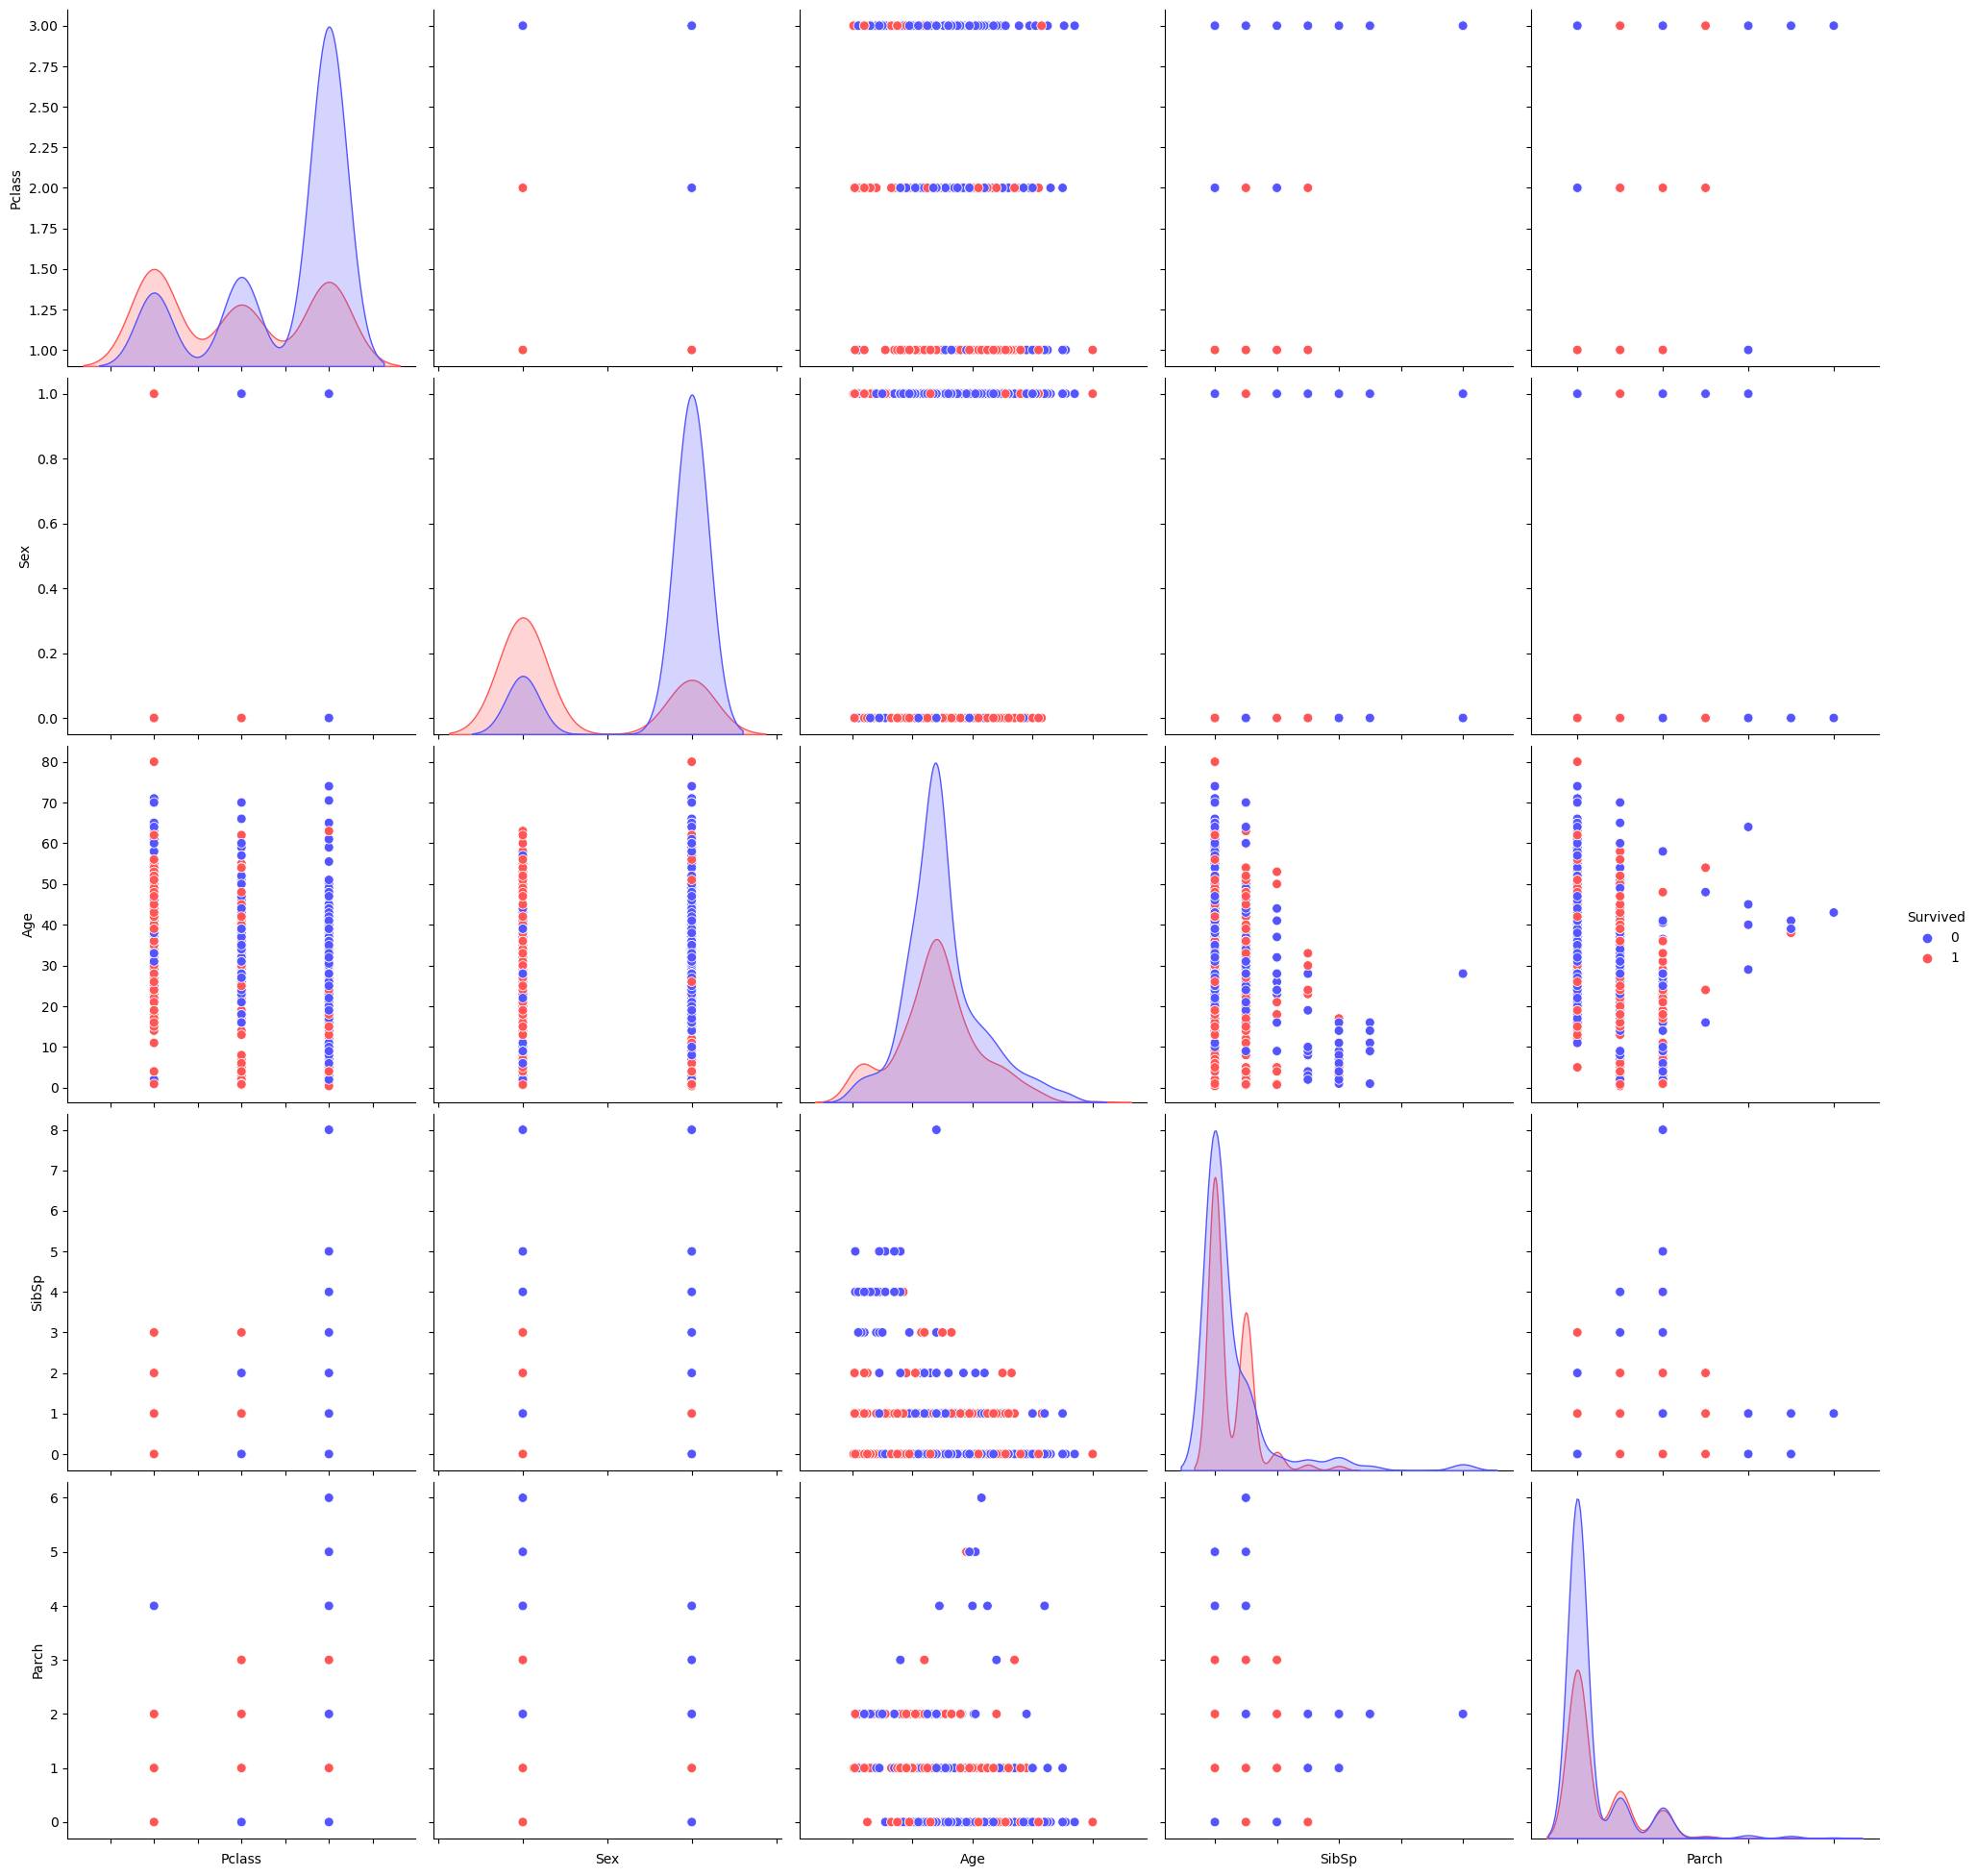

<Figure size 1000x800 with 0 Axes>

In [50]:
g = sns.pairplot(
    Data,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )
plt.figure(figsize=(10,8))

g.set(xticklabels=[]);

## Бонус (не проверяется)

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Можно сконструировать новые признаки, чтобы решить эти вопросы.

Попробуйте сделать следующее.

1) Создайте признак `NameLen` и запишите в него длину имени (`Name`).

2) Создайте признак `FamilySize`, равный *Parch + SibSp + 1*. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [53]:
#Так как мы удалили большинство столбцов, импортируем повторно исходный датафрейм для экспорта новых признаков
data_bonus = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )

In [59]:
#Проверим совпадает ли кол-во объектов в нашем датафрейма Data и data_bonus
data_bonus = data_bonus[data_bonus['Sex'] != 'unknown']
Data.shape[0] == data_bonus.shape[0]


True

In [69]:
Data['NameLen'] = data_bonus['Name'].apply(lambda x: len(x))
Data['FamilySize'] = Data['Parch'] + Data['SibSp'] + 1
Data['IsAlone'] = Data['FamilySize'].apply(lambda x: 1 if x > 1 else 0) # 1 - путешествовал с семьей, 0 - путешествовал 1
Data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,NameLen,FamilySize,IsAlone
0,0,3,1,22.0,1,0,23,2,1
1,1,1,0,38.0,1,0,51,2,1
2,1,3,0,26.0,0,0,22,1,0
3,1,1,0,35.0,1,0,44,2,1
4,0,3,1,35.0,0,0,24,1,0


Посмотрите, как коррелируют новые признаки со столбцом `Survived`.

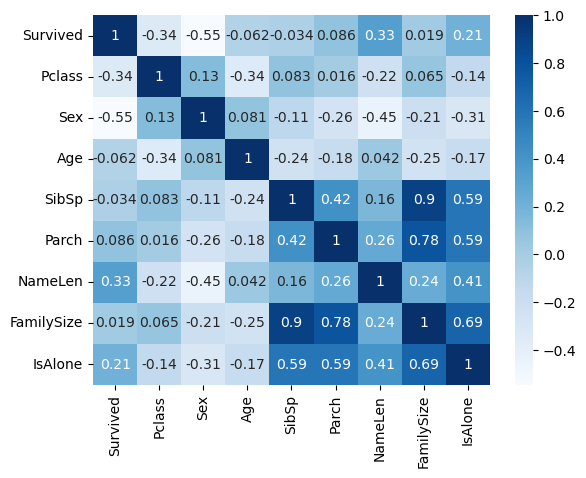

In [70]:
corr = Data.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.


Мы провели  однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет.

Мы видим, что больше всего на выживаемость влияет пол пассажира.


### Наша собственная модель

Напишем свою модель, предсказывающую выживаемость только по признаку `Sex`.

In [71]:
def prediction(x):
    if x.Sex == 1:
        return 0
    return 1

Посчитаем долю правильных ответов нашей модели.

In [72]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

0.7878103837471784